# What is RFM analysis

RFM analysis is a marketing and customer segmentation technique used by businesses to understand and categorize their customers based on their past behavior. RFM stands for Recency, Frequency, and Monetary value, and it is a data-driven approach that helps businesses identify and target their most valuable customers.

- **Recency (R):** Recency measures how recently a customer has made a purchase or interacted with a business. Customers who have engaged or made purchases more recently are often more valuable, as they are more likely to make repeat purchases.

- **Frequency (F):** Frequency measures how often a customer makes purchases or interacts with a business over a specific period. Customers who engage with a business frequently are typically more loyal and may be more valuable in the long run.

- **Monetary Value (M):** Monetary value, also known as "Monetary," measures how much money a customer has spent on purchases or transactions with a business. Customers with higher monetary value are often more profitable for a business.

# Import libraries

In [1]:
%pip install yellowbrick

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

Note: you may need to restart the kernel to use updated packages.


# Load data

In [2]:
# load dataset
df = pd.read_csv("../data/bank_data_C.csv",)

In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [5]:
# obtain descriptive statistics for every feature
df.describe(include = "all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [6]:
# observe data-type for every feature
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


# Data Cleaning and preparation

In [8]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [9]:
# Convert "CustomerDOB" and "TransactionDate" to datetime
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], format = '%d/%m/%y')

In [10]:
# check for null values
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


**Create a new column for customer age**

In [12]:
# write fucntion to calculate age and create new column for it
def calculate_age(df):
    df["age"] = df["TransactionDate"].dt.year - df["CustomerDOB"].dt.year
    return df

In [13]:
df = calculate_age(df)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


**Observe and correct customers with negative age value**

In [14]:
# Observe the wrong date of births
df[df["age"] <= 0]["CustomerDOB"]

1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [15]:
# define function to correct negative age by adjusting date of birth
def adjust_year(date):
    """this function subtracts 100 from all wrong date of birth entry"""
    if date.year > 2016:
        date = date.replace(year=date.year - 100)
    return date

In [16]:
df["CustomerDOB"] = df["CustomerDOB"].apply(adjust_year)

In [17]:
df = calculate_age(df)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


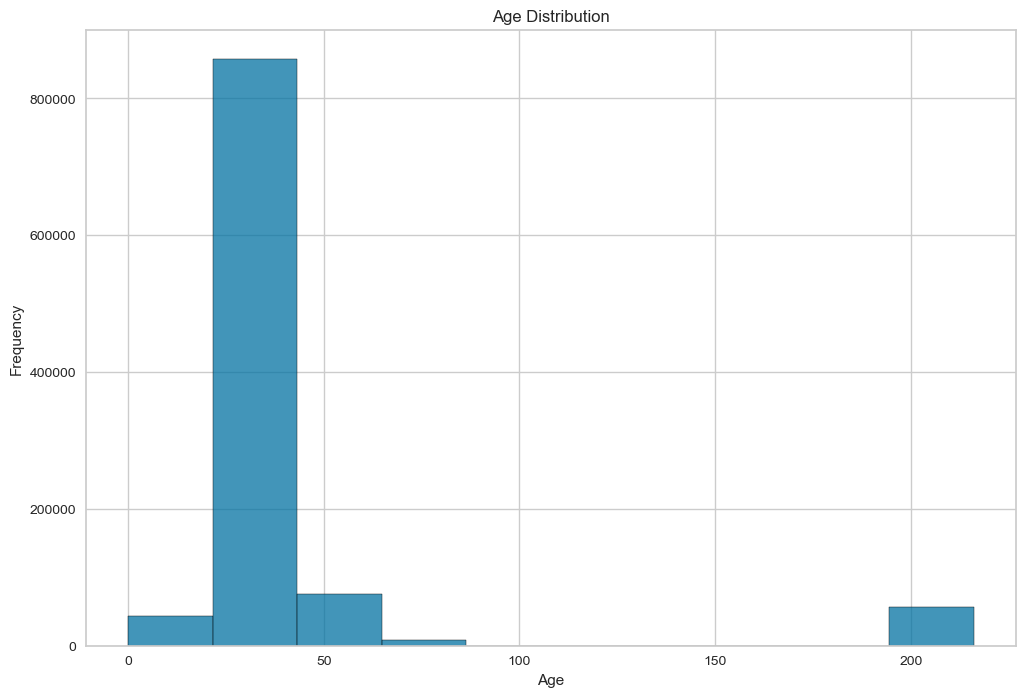

In [18]:
# observe age distribution
plt.figure(figsize = (12,8))
sns.histplot(df['age'], bins=10, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Average life expectancy in india is 70year and in our data we have 56,292 customers with age above 100 all with same date of bith. It's suspicious and can be as a result of wrong entry or was probably entered in attempt to fill missing values.

These data entries will be replaced with the mean value of age

In [19]:
def replace_age_outlier(df):
    # Define a threshold for identifying age outliers
    age_threshold = 1900  # Adjust this value as needed

    # Find indices of age outliers
    age_outliers = df[df["CustomerDOB"].dt.year < age_threshold].index

    # Calculate the mean age (excluding outliers)
    mean_DOB = df[~df.index.isin(age_outliers)]["CustomerDOB"].mean()

    # Replace age outliers with the mean age
    df.loc[age_outliers, "CustomerDOB"] = mean_DOB

    return df

In [20]:
# apply function and calculate age again
df = replace_age_outlier(df)
df = calculate_age(df)

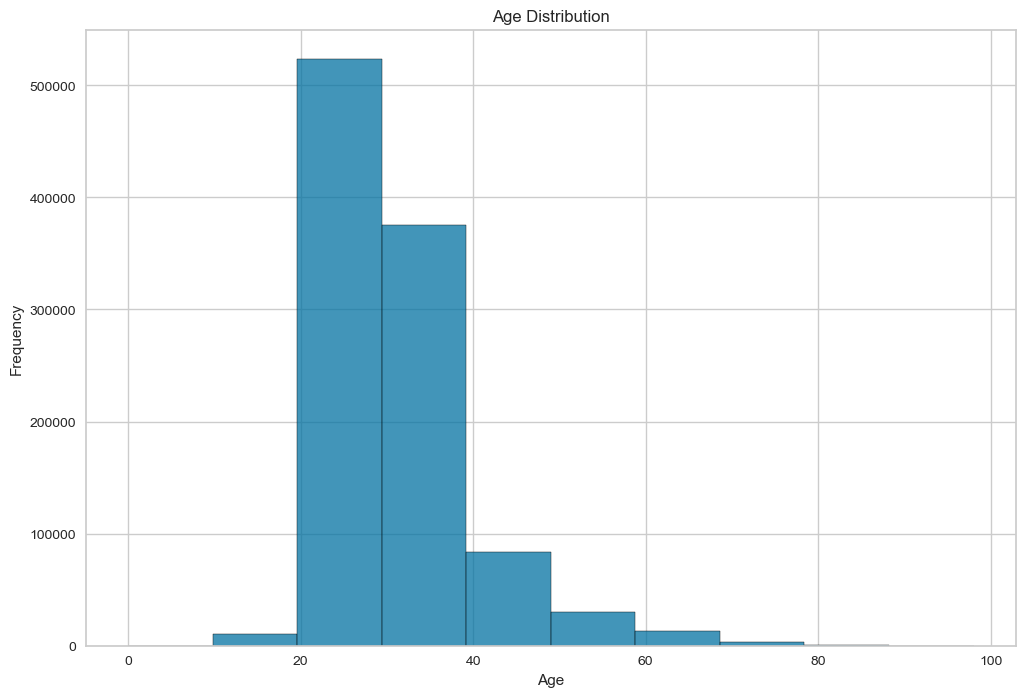

In [21]:
# observe age distribution again
plt.figure(figsize = (12,8))
sns.histplot(df['age'], bins=10, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [22]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


**Gender**

In [23]:
# observe unique entries in gender
df["CustGender"].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [24]:
# Replace 'T' with 'M' in the 'gender' column
df["CustGender"] = df['CustGender'].replace('T', 'M')

**Location**

In [25]:
df["CustLocation"].value_counts()

MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: CustLocation, Length: 9275, dtype: int64

**Account Balance**

In [26]:
df["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

**Transaction amount**

Find transactions with 0 as amount and drop to avoid giving false values in transaction recency and frequency

In [27]:
df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

820

In [28]:
df.drop(df[df["TransactionAmount (INR)"] == 0].index.tolist(), axis = 0, inplace = True)

# Exploratory data analysis

In [31]:
df["CustomerID"].nunique()

878763

In [32]:
df.shape

(1040794, 10)

We have 878,763 unique customerID and 1,040,794 data entries. Meaning we should expect low frequency values for each customers

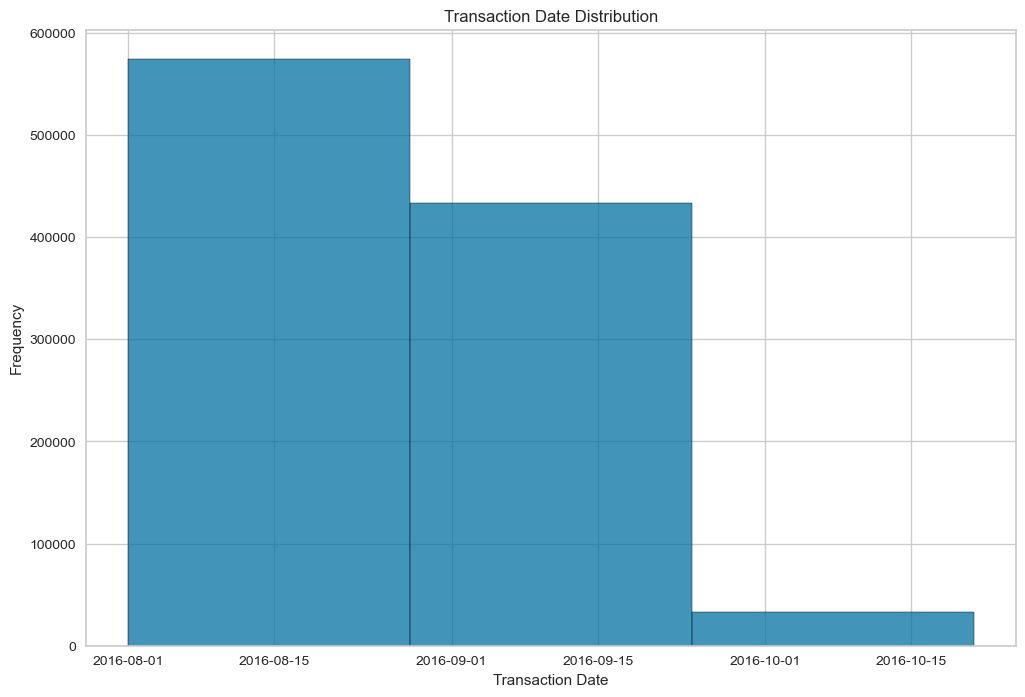

In [33]:
# plot the distibution of data across unique time points
plt.figure(figsize = (12,8))
sns.histplot(df['TransactionDate'], bins=3, kde=False)
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.title('Transaction Date Distribution')
plt.show()

The transaction dates spans between 3 months. This might result in low recency values and suppports the claim that frequency values are expected to be low.

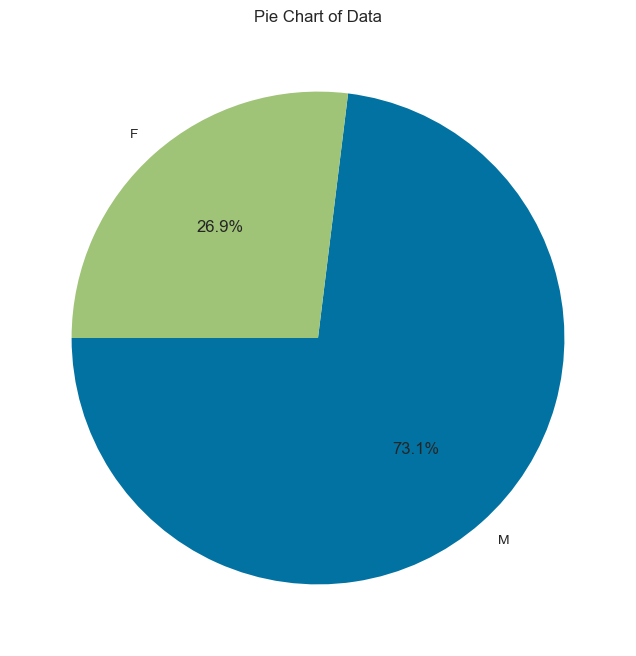

In [34]:
# Create a pie chart
plt.figure(figsize=(8, 8))
gender_count = df["CustGender"].value_counts()
plt.pie(gender_count,labels = gender_count.index, autopct='%1.1f%%', startangle=180)
plt.title('Pie Chart of Data')

plt.show()

The gender distribution is severly imbalanced so we might have more males in every segments gotten from our analysis

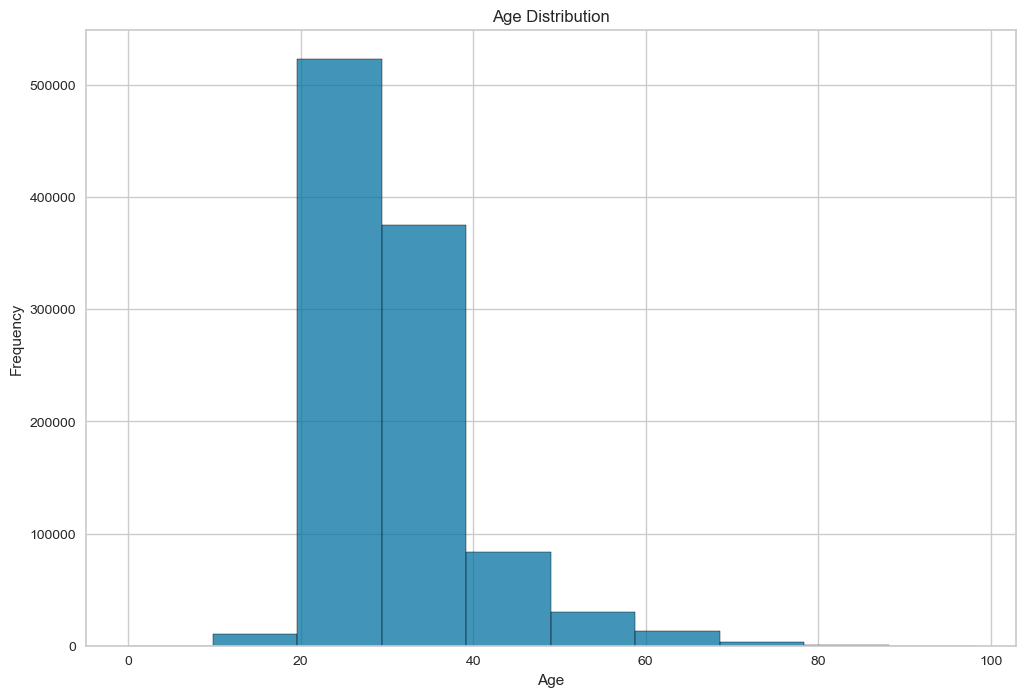

In [35]:
# plot age distribution
plt.figure(figsize = (12,8))
sns.histplot(df['age'], bins=10, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

The above plot shows the age distibution of customers. Majority of customers falls within the 20 to 40 age range

# RFM analysis

In [36]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


## Recency

Recency measures how recently a customer has engaged with your business, focusing on the time elapsed since their last interaction.
To calculate for recency, we first have to establish a date to use as reference and measure every transaction date relative to it.


The maximum date on the dataframe is used as our reference and the difference (in days) between a trasaction date and the maximum date is a measure of how recent that transaction is

In [38]:
day = df["TransactionDate"].max() # obtain maximum date
day = pd.to_datetime(day)           # convert to date-time

In [39]:
recency = df.groupby(["CustomerID"]).agg({"TransactionDate": lambda x: ((day - x.max()).days) +1 }) #use lambda function to carryout differencing operation

In [40]:
recency.head()

,TransactionDate
CustomerID,
C1010011,26
C1010012,69
C1010014,76
C1010018,37
C1010024,65


## Frequency

Frequency assesses how often a customer engages with your business over a specific period, counting the number of transactions or interactions.
The frequency of a particular customer is calculated by counting every unique transactionID for that customer.

In [41]:
frequency = df.drop_duplicates(subset = "TransactionID").groupby(["CustomerID"])[["TransactionID"]].count()

In [42]:
frequency.head()

,TransactionID
CustomerID,
C1010011,2
C1010012,1
C1010014,2
C1010018,1
C1010024,1


## Monetary Value

Monetary Value quantifies the total value of a customer's transactions over a specified time frame, reflecting how much they have spent on your products or services.
A customers monetary value is calculated by taking the total sum of all transactions made by that customer

In [43]:
monetary = df.groupby("CustomerID")[["TransactionAmount (INR)"]].sum()

In [44]:
monetary.head()

,TransactionAmount (INR)
CustomerID,
C1010011,5106.0
C1010012,1499.0
C1010014,1455.0
C1010018,30.0
C1010024,5000.0


## Create RFM table

In [45]:
# create the RFM table
RFM_table = pd.concat([recency,frequency,monetary], axis = 1)

In [47]:
RFM_table = RFM_table.rename(columns = {"TransactionDate" : "recency","TransactionID": "frequency","TransactionAmount (INR)": "monetary" })
RFM_table.head()

,recency,frequency,monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [48]:
# Verify the accuracy of the table.
df[df["CustomerID"] == "C1010012" ]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
360421,T363022,C1010012,1994-07-28,M,MUMBAI,24204.49,2016-08-14,204409,1499.0,22


## Explore RFM data

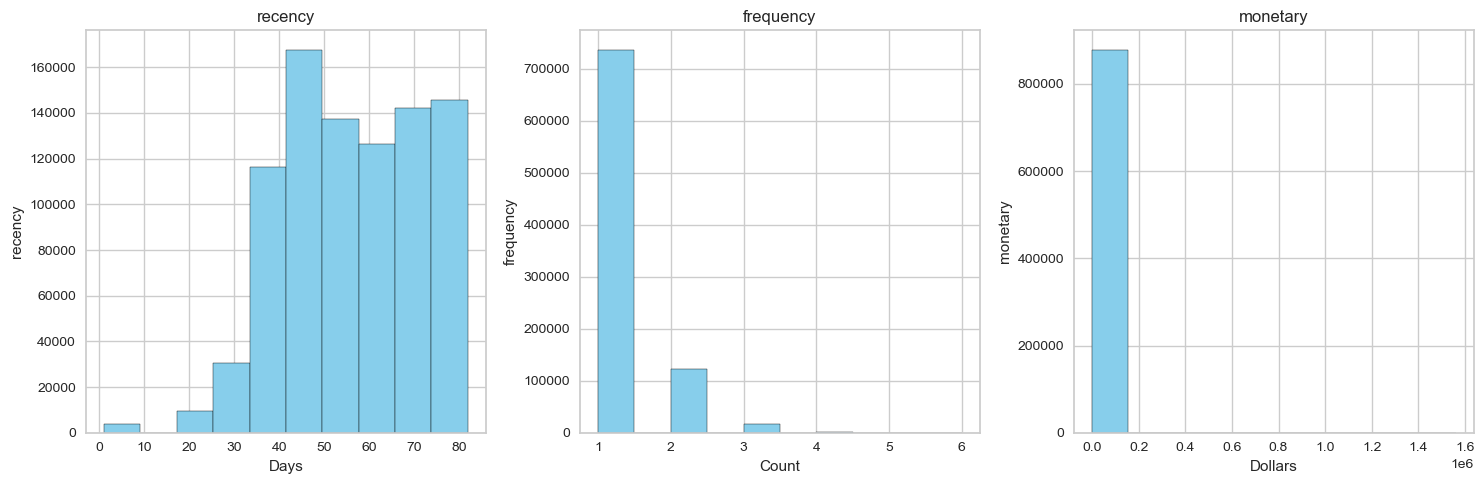

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create a list of column names
columns = ['recency', 'frequency', 'monetary']

# Use a for loop to plot histograms for each column
for i, col in enumerate(columns):
    axes[i].hist(RFM_table[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Days' if col == 'recency' else 'Count' if col == 'frequency' else 'Dollars')
    axes[i].set_ylabel(col)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

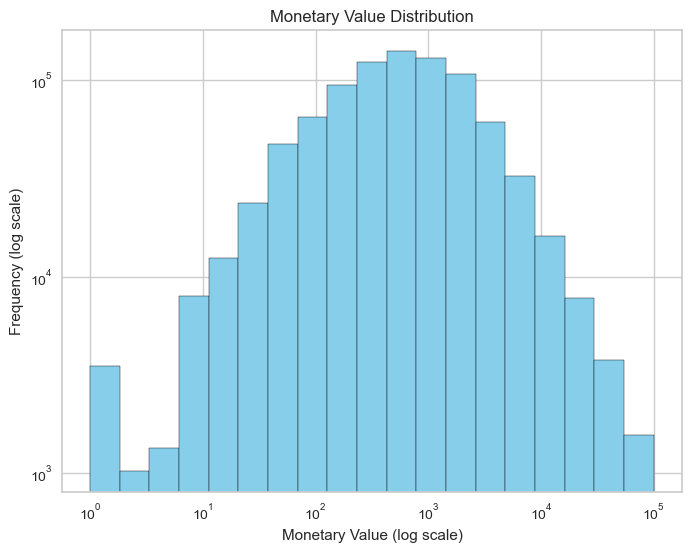

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(RFM_table["monetary"], bins=np.logspace(0, 5, 20), color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value (log scale)')
plt.ylabel('Frequency (log scale)')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

**Observe correlation**

In [51]:
RFM_table.corr()

,recency,frequency,monetary
recency,1.000000,-0.223293,-0.020675
frequency,-0.223293,1.000000,0.097491
monetary,-0.020675,0.097491,1.000000


No strong correlation between features

# Assign RFM score

In [52]:
RFM_table.head()

,recency,frequency,monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [53]:
# Calculate quartiles for each RFM component
quartiles = RFM_table[['recency', 'frequency', 'monetary']].quantile(q=[0.25, 0.5, 0.75]).to_dict()

In [54]:
quartiles

{'recency': {0.25: 44.0, 0.5: 56.0, 0.75: 69.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [55]:
RFM_table["frequency"].value_counts()

1    736989
2    123500
3     16460
4      1659
5       141
6        14
Name: frequency, dtype: int64

In [56]:
def assign_R_score(x, feature):
    """this function is used to assign recency score
    the more recent a customer's latest transaction is, the higher the recency score"""

    if x <= quartiles[feature][0.25]:
        return 4
    elif x <= quartiles[feature][0.5]:
        return 3
    elif x <= quartiles[feature][0.75]:
        return 2
    else:
        return 1

def assign_M_score(x, feature):
    """This function is used for assigning monetary score.
    the higher the monetary value, the higher the monetary score"""

    if x <= quartiles[feature][0.25]:
        return 1
    elif x <= quartiles[feature][0.5]:
        return 2
    elif x <= quartiles[feature][0.75]:
        return 3
    else:
        return 4

In [57]:
def custom_frequency_score(x):
    """This function is used for assigning frequency score.
    frequency of 1,2 and 3 are assgned scores of 1,2 and 3 respectively
    and frequency of 4,5,and 6 are assigned scores of 4"""

    if x <= 3:
        return x
    else:
        return 4

In [58]:
# Assign quartile scores for recency
RFM_table['R_score'] = RFM_table['recency'].apply(lambda x: assign_R_score(x, 'recency'))

# Assign custom Frequency scores
RFM_table['F_score'] = RFM_table['frequency'].apply(custom_frequency_score)

# Assign quartile scores for monetary component
RFM_table['M_score'] = RFM_table['monetary'].apply(lambda x: assign_M_score(x, 'monetary'))

In [59]:
# Calculate the RFM score by combining the three individual scores
RFM_table['RFM_group'] = RFM_table['R_score'].astype(str) + RFM_table['F_score'].astype(str) + RFM_table['M_score'].astype(str)

In [60]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_group
CustomerID,,,,,,,
C1010011,26,2,5106.0,4,2,4,424
C1010012,69,1,1499.0,2,1,3,213
C1010014,76,2,1455.0,1,2,3,123
C1010018,37,1,30.0,4,1,1,411
C1010024,65,1,5000.0,2,1,4,214


**Create the RFM score**

summing up the values for each RFM component works under the assumption that each components are equally valuable. To properly segment customers based on the values gotten from the summation, the range for segmentation has to be clearly defined.

- High: High valued customers should be between the range of **12** - **10**. This category of customers are the most loyal customers with have high recency, frequency and monetary values.
- Medium: medium valued customers should be between the range of **9** to  **6**. This category contains customers that are moderatly loyal with average RFM score.
- Low: Low valued customers should be between the range of **5** to **3**. This category contains customers with high risk of churn.

In [61]:
RFM_table["RFM_score"] = RFM_table[['R_score', 'M_score', 'F_score']].sum(axis = 1)

In [62]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_group,RFM_score
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,424,10
C1010012,69,1,1499.0,2,1,3,213,6
C1010014,76,2,1455.0,1,2,3,123,6
C1010018,37,1,30.0,4,1,1,411,6
C1010024,65,1,5000.0,2,1,4,214,7


<Axes: xlabel='RFM_score', ylabel='count'>

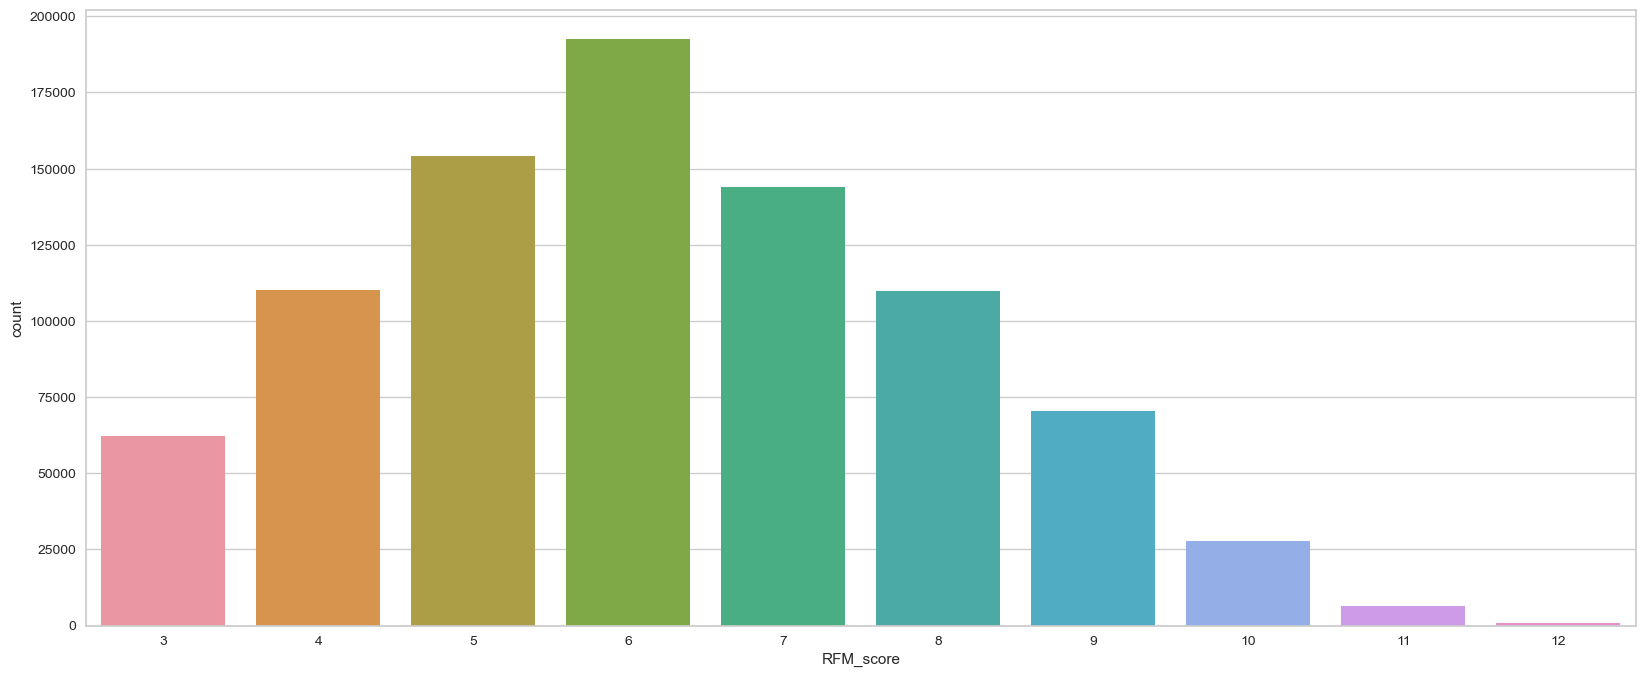

In [63]:
plt.figure(figsize = (20,8))
sns.countplot( x = RFM_table["RFM_score"])

In [64]:
def assign_segments(x):
    if x <= 5:
        return "low"
    elif x <= 9:
        return "medium"
    else:
        return "high"

In [65]:
RFM_table["segments"] = RFM_table["RFM_score"].apply(lambda x: assign_segments(x))

In [66]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_group,RFM_score,segments
CustomerID,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,424,10,high
C1010012,69,1,1499.0,2,1,3,213,6,medium
C1010014,76,2,1455.0,1,2,3,123,6,medium
C1010018,37,1,30.0,4,1,1,411,6,medium
C1010024,65,1,5000.0,2,1,4,214,7,medium


<Axes: xlabel='segments', ylabel='count'>

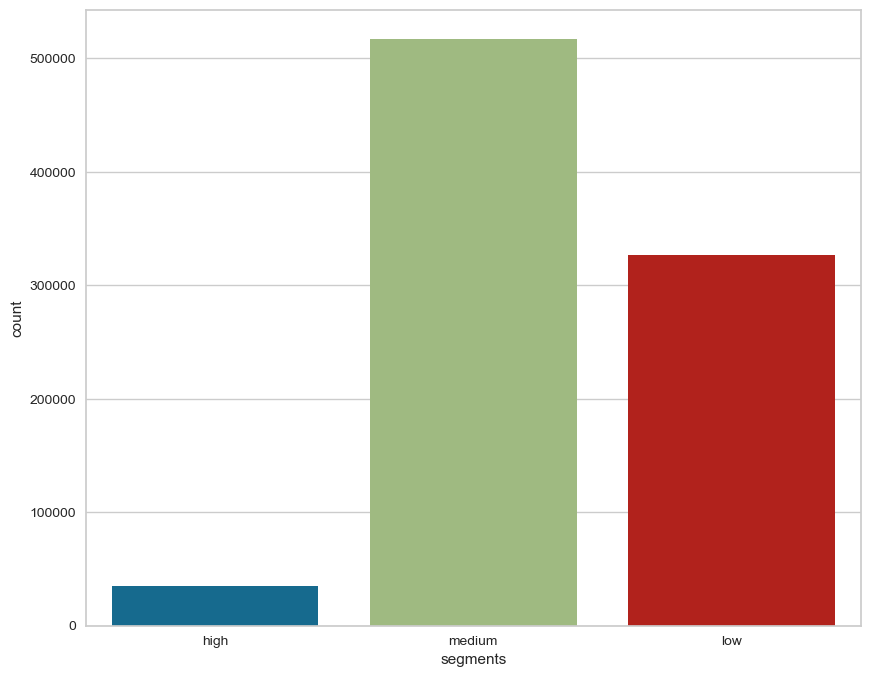

In [67]:
plt.figure(figsize = (10,8))
sns.countplot( x = RFM_table["segments"])

From the chart above,
- we have more medium valued customers who are either potential high valued customers or potential low valued customers.

- The number of customers that stand the risk of churning is too high (low valued customers)

- low number of high valued/ Loyal customers

**Create weighted RFM score**

In creating a weighted a RFM score, we have to consider the aim of the firm.

- Recency:  In a new bank, customer retention and engagement are often top priorities. Consider giving Recency significant weight **(2)**.

- Frequency:  In a new bank, especially during the first few months, customers might not have had many interactions. However, you still want to encourage regular engagement. Give some weight to Frequency, but not as much as Recency **(1)**.

- Monetary:  Monetary reflects the amount of money customers have transacted with the bank. While this is important, in the early stages, you might not have a full view of each customer's monetary value. Give it moderate weight as well **(1)**.

In [69]:
RFM_table['weighted_score'] = (RFM_table['R_score'] * 2) + (RFM_table["F_score"] * 1) + (RFM_table['M_score'] * 1)

In [70]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_group,RFM_score,segments,weighted_score
CustomerID,,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,424,10,high,14
C1010012,69,1,1499.0,2,1,3,213,6,medium,8
C1010014,76,2,1455.0,1,2,3,123,6,medium,7
C1010018,37,1,30.0,4,1,1,411,6,medium,10
C1010024,65,1,5000.0,2,1,4,214,7,medium,9


<Axes: xlabel='weighted_score', ylabel='count'>

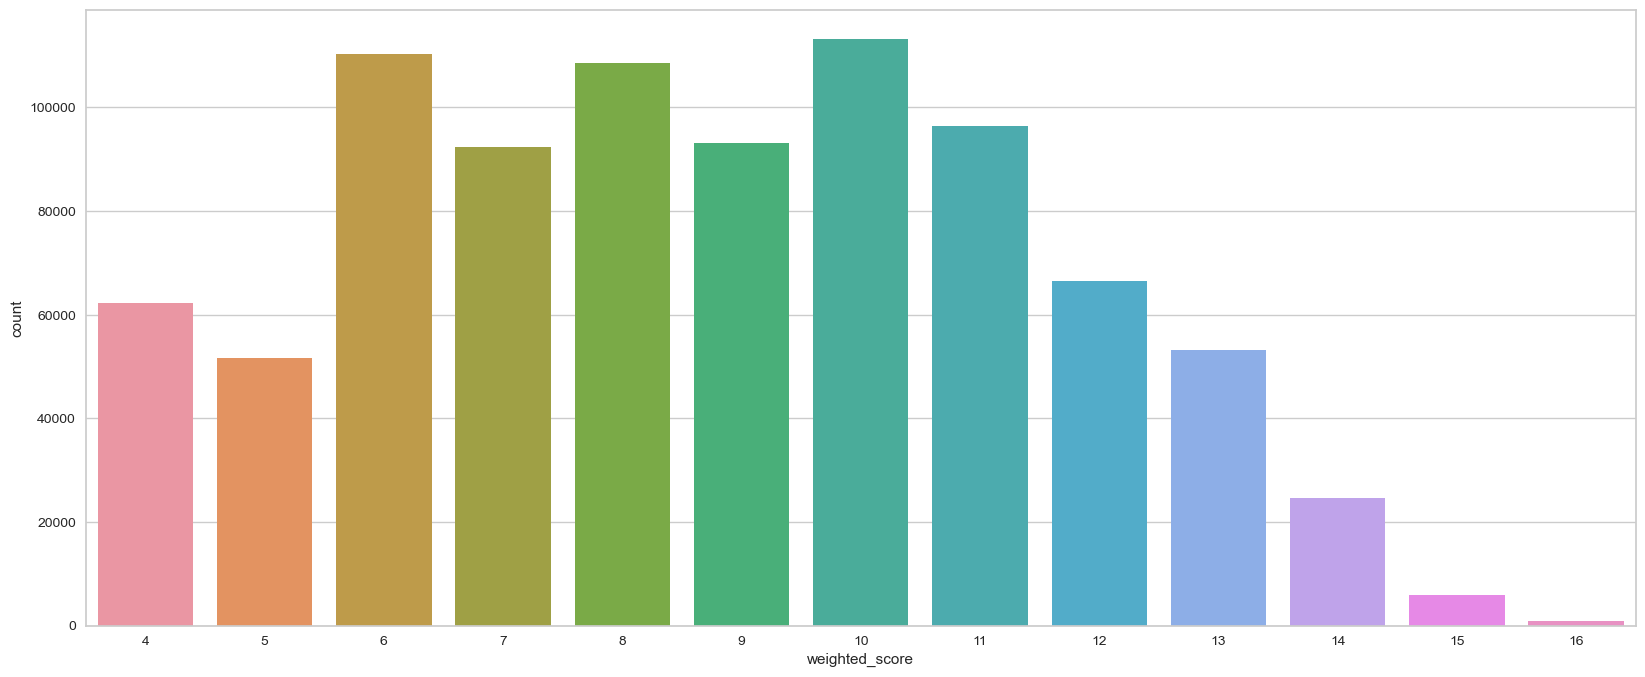

In [71]:
plt.figure(figsize = (20,8))
sns.countplot( x = RFM_table["weighted_score"])

In [72]:
RFM_table["weighted_segments"] = RFM_table["weighted_score"].apply(lambda x: assign_segments(x))

<Axes: xlabel='weighted_segments', ylabel='count'>

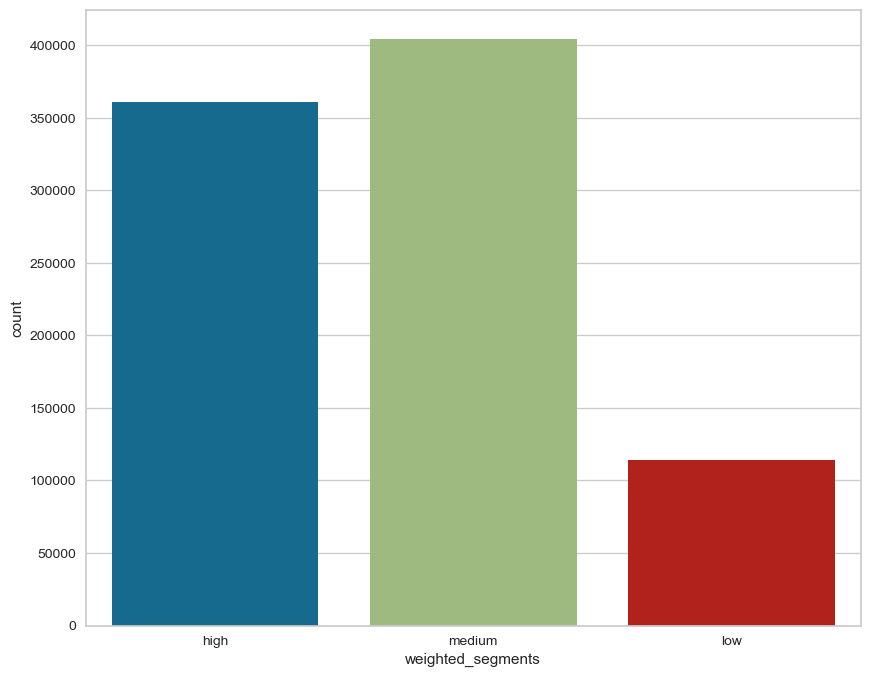

In [73]:
plt.figure(figsize = (10,8))
sns.countplot( x = RFM_table["weighted_segments"])

Placing more priority on a customer recency, we then have more high valued customers than customers who are likely to churn according to our analysis (low valued customers)